# Campaign management - Description
Predict Interaction rate from ad descriptions

In [1]:
from fastai import *
from fastai.text import *
import os
import pathlib as path
import pandas as pd
import re

### Language model loading

In [2]:
HOME = path.Path('/home/jovyan/work')
DATA = HOME/'data'
MODELS = DATA/'corpus/models'
bs = 256 # Batch size

### Training regression
Load saved dataset and vocabulary

In [3]:
df_train = pd.read_csv(DATA/'descriptions.csv')
print(df_train.shape)
df_train.head()

(4694, 2)


,text,rate
0,božićni ukrasi veliki izbor na jednom mjestu,11.06
1,igre za djevojčice,11.15
2,usisavači late night shopping,9.79
3,ploče za kuhanje više od modela u prodaji,9.24
4,tražite playstation,6.47


In [4]:
vocab = Vocab.load(MODELS/'campaign_vocab.pkl')

In [5]:
# See possible approaches https://forums.fast.ai/t/regression-using-fine-tuned-language-model/29091/56
data_regr = (TextList.from_df(df=df_train, path=DATA, cols='text', vocab=vocab)
             .split_by_rand_pct(0.2)
             .label_from_df('rate', label_cls=FloatList)
             .databunch(bs=bs))

/home/jovyan/.local/lib/python3.6/site-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/home/jovyan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [6]:
# Loss function - mse, optimizer - Adam ()-default, last layer - linear
learn = text_classifier_learner(data_regr, 
                                arch = AWD_LSTM, 
                                drop_mult=0.3,
                                metrics = rmse)
learn.loss_func = MSELossFlat()
learn.load_encoder(MODELS/'campaign_encoder')
learn.freeze()

/home/jovyan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/jovyan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the n

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


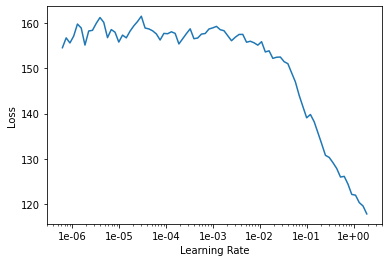

In [7]:
learn.lr_find()
learn.recorder.plot()

In [8]:
learn.fit_one_cycle(1, 6e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,110.732819,52.122166,7.194388,00:08


/home/jovyan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [9]:
learn.save(MODELS/'description-first-run')

In [10]:
learn.load(MODELS/'description-first-run')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (3756 items)
x: TextList
xxbos božićni ukrasi veliki izbor na jednom mjestu,xxbos igre za djevojčice,xxbos ploče za kuhanje više od modela u prodaji,xxbos tražite playstation,xxbos izaberi gorenje hladnjake na rate
y: FloatList
11.06,11.15,9.24,6.47,13.33
Path: /home/jovyan/work/data;

Valid: LabelList (938 items)
x: TextList
xxbos tražiš daikin klime besplatna dostava može i do rata,xxbos vivax televizor cm,xxbos gorenje ploče za kuhanje naruči online na hr plaćanje na rate,xxbos aku alati na akciji isporuka odmah kupuj do rata besplatna dostava iznad kn više od artikala u ponudi,xxbos najbolje perilicesušilice naruči online na hr plaćanje na rate
y: FloatList
15.56,5.68,18.32,18.67,18.18
Path: /home/jovyan/work/data;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(3056, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(3056, 400, padding

In [11]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(6e-2/(2.6**4),6e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,43.757088,32.031322,5.653080,00:10


/home/jovyan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [12]:
# Save to possibly retrain again
learn.save(MODELS/'description-second-run')
# Load again
learn.load(MODELS/'description-second-run')
pass # don't show model definition again

In [13]:
learn.freeze_to(-3)
learn.fit_one_cycle(2, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,33.162979,30.321115,5.501518,00:13
1,30.499300,27.475548,5.238445,00:14


/home/jovyan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/jovyan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the n

In [16]:
# Save to possibly retrain again
learn.save(MODELS/'description-third-run')
# Load again
learn.load(MODELS/'description-third-run')
pass

In [17]:
learn.unfreeze()
learn.fit_one_cycle(3, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,37.456825,36.300800,6.014886,00:18
1,37.579453,35.085907,5.914987,00:47
2,36.784500,32.930931,5.736060,00:24


/home/jovyan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/jovyan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the n

In [18]:
learn.save(MODELS/'description-final')

In [19]:
learn.predict("Kupi perilicu posuđa, najbolji popust")

(FloatItem [11.474022], tensor([11.4740]), tensor([11.4740]))

In [20]:
learn.export(MODELS/'description-learner.pkl')